In [1]:
import kagglehub
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = kagglehub.dataset_download("merishnasuwal/grayscale-images")
print(" Dataset downloaded successfully at:", path)

Using Colab cache for faster access to the 'grayscale-images' dataset.
 Dataset downloaded successfully at: /kaggle/input/grayscale-images


In [4]:
image_dir = path
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Load first few images (for example, 5)
images = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in image_files[:5]]
images = [cv2.resize(img, (256, 256)) for img in images if img is not None]

print(f"Loaded {len(images)} images successfully.")


Loaded 4 images successfully.


In [5]:
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.05):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255
    num_pepper = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

In [6]:
def add_speckle_noise(image):
    gauss = np.random.randn(*image.shape)
    noisy = image + image * gauss * 0.1
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

In [7]:
gaussian_noisy = [add_gaussian_noise(img) for img in images]
salt_pepper_noisy = [add_salt_pepper_noise(img) for img in images]
speckle_noisy = [add_speckle_noise(img) for img in images]

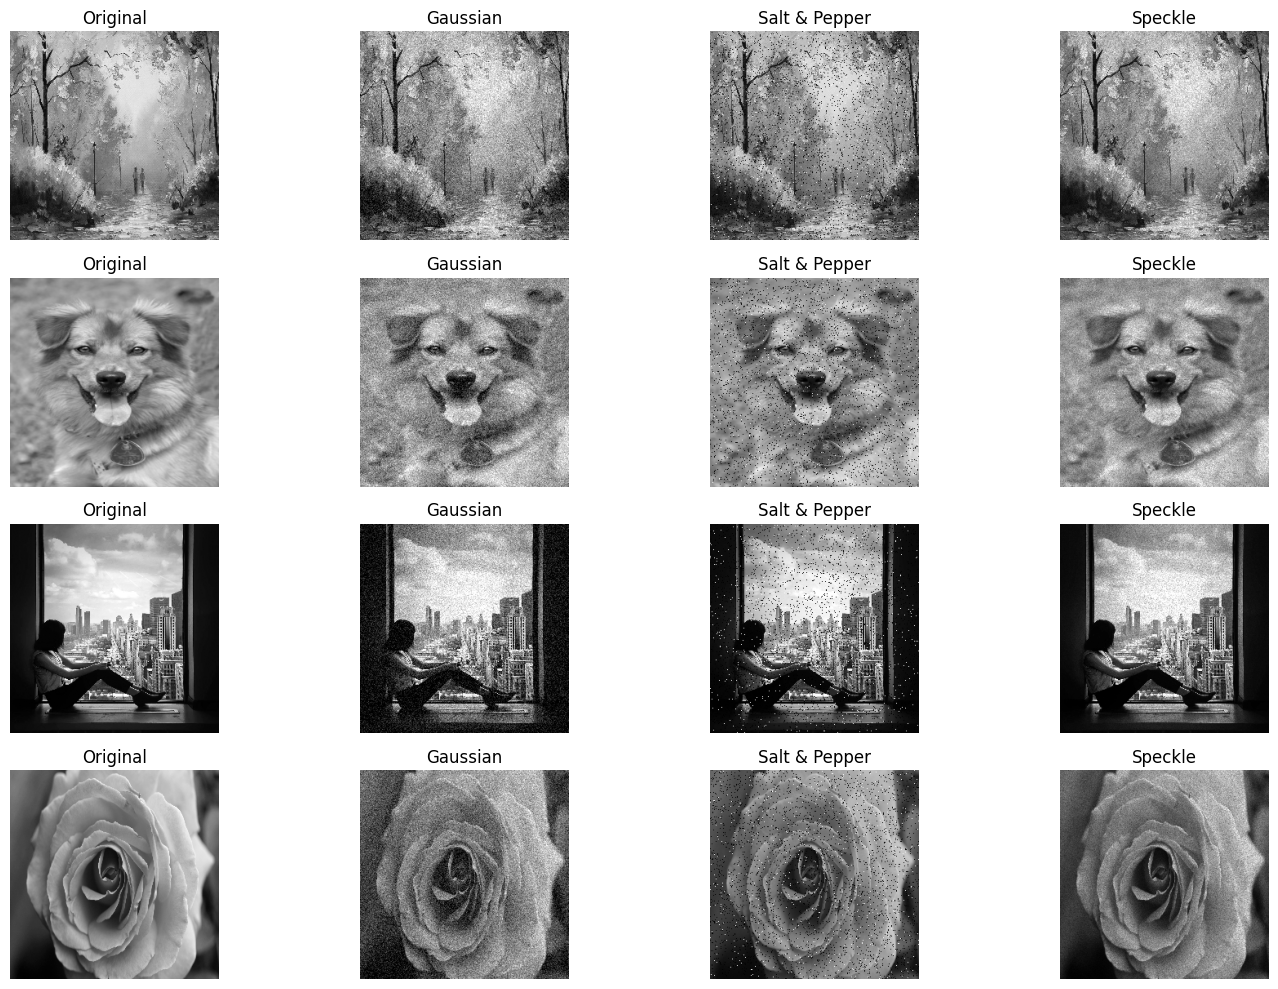

In [8]:
plt.figure(figsize=(15, 10))

for i in range(len(images)):
    plt.subplot(len(images), 4, 4*i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(len(images), 4, 4*i + 2)
    plt.imshow(gaussian_noisy[i], cmap='gray')
    plt.title('Gaussian')
    plt.axis('off')

    plt.subplot(len(images), 4, 4*i + 3)
    plt.imshow(salt_pepper_noisy[i], cmap='gray')
    plt.title('Salt & Pepper')
    plt.axis('off')

    plt.subplot(len(images), 4, 4*i + 4)
    plt.imshow(speckle_noisy[i], cmap='gray')
    plt.title('Speckle')
    plt.axis('off')

plt.tight_layout()
plt.show()


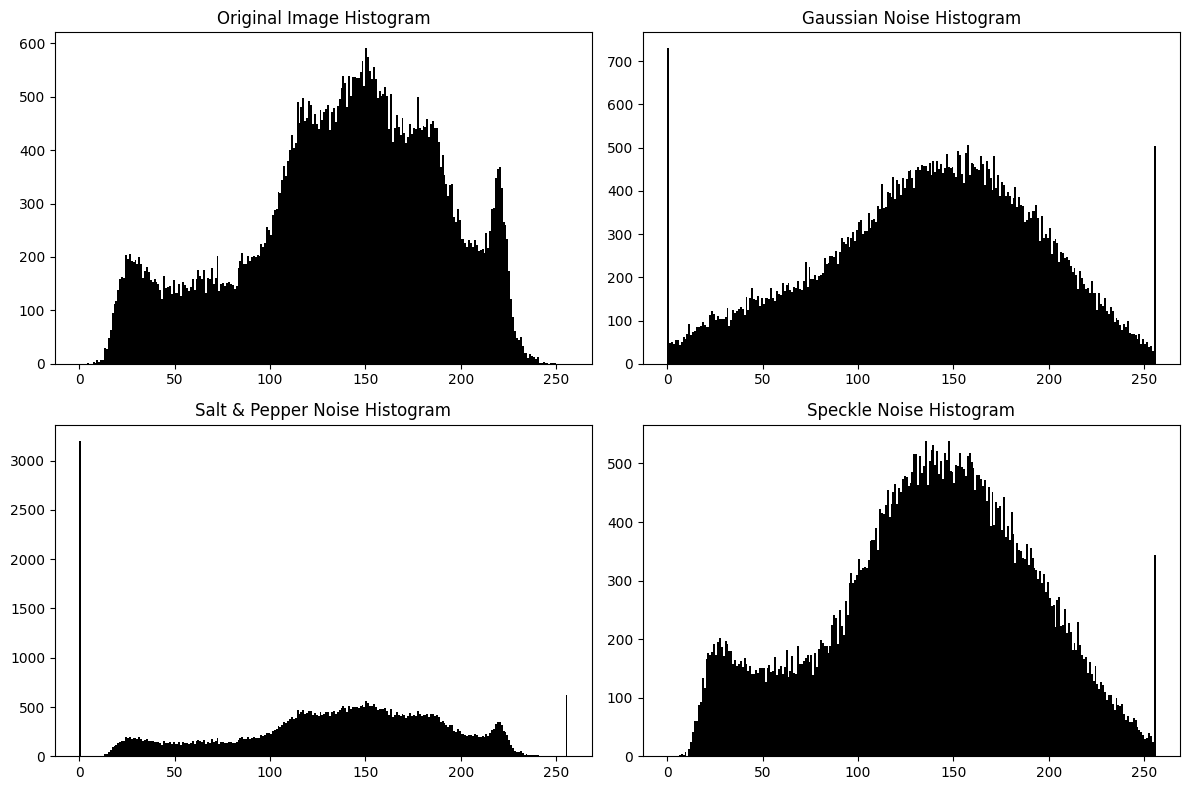

In [9]:
img = images[0]
gauss_img = gaussian_noisy[0]
sp_img = salt_pepper_noisy[0]
speckle_img = speckle_noisy[0]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Original Image Histogram")

plt.subplot(2, 2, 2)
plt.hist(gauss_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Gaussian Noise Histogram")

plt.subplot(2, 2, 3)
plt.hist(sp_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Salt & Pepper Noise Histogram")

plt.subplot(2, 2, 4)
plt.hist(speckle_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Speckle Noise Histogram")

plt.tight_layout()
plt.show()